In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [65]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.shape

(42000, 785)

In [67]:
import matplotlib.pyplot as plt

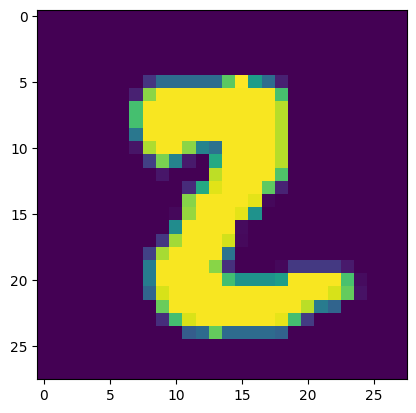

In [68]:
plt.imshow(df.iloc[16, 1:].values.reshape(28, 28))

In [69]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
X_train.shape

(33600, 784)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

14.042845964431763


In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [80]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [81]:
X_train_trf.shape

(33600, 200)

In [82]:
knn = KNeighborsClassifier()

In [83]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [84]:
y_pred = knn.predict(X_test_trf)

In [85]:
accuracy_score(y_test, y_pred)

0.9502380952380952

In [86]:
maxi = 0.9648809523809524
ind = 0
for i in range (1,100):
    pca = PCA(n_components = i)
    
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    acc = accuracy_score(y_test, y_pred)
    if acc > maxi:
        maxi = acc
        ind  = i
    
    print(acc)

0.2577380952380952
0.3236904761904762
0.5104761904761905
0.6661904761904762
0.7376190476190476
0.8227380952380953
0.843452380952381
0.8720238095238095
0.8872619047619048
0.9061904761904762
0.9114285714285715
0.9183333333333333
0.9279761904761905
0.9347619047619048
0.9386904761904762
0.9379761904761905
0.9408333333333333
0.9410714285714286
0.9433333333333334
0.9436904761904762
0.9436904761904762
0.9442857142857143
0.9436904761904762
0.9446428571428571
0.9485714285714286
0.9484523809523809
0.9473809523809524
0.9478571428571428
0.9491666666666667
0.9504761904761905
0.9513095238095238
0.9510714285714286
0.9516666666666667
0.9513095238095238
0.9514285714285714
0.9523809523809523
0.9525
0.9533333333333334
0.9529761904761904
0.9522619047619048
0.9532142857142857
0.9532142857142857
0.9541666666666667
0.9533333333333334
0.9526190476190476
0.9526190476190476
0.9530952380952381
0.9538095238095238
0.9539285714285715


In [87]:
print(maxi, ind)

0.9648809523809524 0


In [88]:
pca = PCA(n_components = 2)
    
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf

array([[-2.71864239, -0.48948955],
       [-0.6769514 , -6.75371894],
       [-3.03324004,  6.50960034],
       ...,
       [ 2.14883537,  0.78044707],
       [ 1.05956477,  0.9481687 ],
       [17.70258543,  1.96213542]])

In [89]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:, 0],
                y = X_train_trf[:, 1],
                color = y_train_trf, 
                color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [90]:
#transforming in 3D
pca = PCA(n_components = 3)
    
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf

array([[-2.71863101, -0.48949531,  1.13556575],
       [-0.67699485, -6.75413503, -2.33635267],
       [-3.03321061,  6.51009758,  7.49148167],
       ...,
       [ 2.14883851,  0.7803311 , -0.74738997],
       [ 1.05957724,  0.94805976,  3.94998392],
       [17.70256473,  1.96086473, -4.94341092]])

In [91]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x = X_train_trf[:, 0],
                y = X_train_trf[:, 1], z = X_train_trf[:, 2],
                color = y_train_trf
                )
fig.update_layout(
    margin = dict(l = 20, r = 20, t = 20, b = 20)
)

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [92]:
pca.explained_variance_
#eigen values

array([40.67111198, 29.17023375, 26.74459613])

In [93]:
pca.components_

array([[-6.60371792e-18,  5.41886411e-19,  1.11100131e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-8.68754201e-17, -1.28144431e-19, -1.53283900e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.50269025e-17, -9.06105266e-18, -4.94213618e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])